In [294]:
import pandas as pd
import numpy as np
import os

In [295]:
dataRead = pd.read_csv('Data.csv')

In [296]:
dataRead = dataRead.drop(columns= ['row ID'])
dataRead.info

<bound method DataFrame.info of       itching  skin_rash  chills  joint_pain  stomach_pain  acidity  \
0           0          0       0           0             1        1   
1           0          0       0           0             1        0   
2           0          0       0           0             1        1   
3           0          0       0           0             1        1   
4           0          0       0           0             1        1   
...       ...        ...     ...         ...           ...      ...   
2778        0          0       0           0             0        0   
2779        0          0       0           0             0        0   
2780        0          1       0           0             0        0   
2781        0          1       0           1             0        0   
2782        0          1       0           0             0        0   

      ulcers_on_tongue  vomiting  fatigue  weight_gain  ...  \
0                    1         1        0           

In [297]:
# Create correlation matrix
corr_matrix = dataRead.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.97)]

# Drop features 
dataRead.drop(to_drop, axis=1, inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_14240\2220699963.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [298]:

# variance = dataRead.var()
# columns = dataRead.columns

# variable = [ ]

# for i in range(0,len(variance)):
#     print(variance[i])

#     if variance[i]>=0.038: #setting the threshold as 1%
        
#         variable.append(columns[i])


# new_data = dataRead[variable]

# # first five rows of the new data
# new_data.head()

# dataRead = new_data
# dataRead.info

In [299]:
# from sklearn.feature_selection import VarianceThreshold

# threshold_n=0.6
# sel = VarianceThreshold(threshold=0.2417)
# sel.fit(dataRead)
# #dataRead[dataRead.columns[sel.get_support(indices=True)]] 
# sel.get_support()

# concol = [column for column in dataRead.columns 
#                     if column not in dataRead.columns[sel.get_support()]]

# for features in concol:
#     print(features)


# #dataRead.drop(concol,axis=1)

# #dataRead.info




In [300]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

In [301]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [302]:
#kmean = KMeans(n_clusters:= 8, init = "k-means++", n_init = 100, max_iter= 1000, tol = 0.001, random_state= 0, algorithm = "elkan").fit(dataRead)
dataRead.info

<bound method DataFrame.info of       itching  skin_rash  chills  joint_pain  stomach_pain  acidity  \
0           0          0       0           0             1        1   
1           0          0       0           0             1        0   
2           0          0       0           0             1        1   
3           0          0       0           0             1        1   
4           0          0       0           0             1        1   
...       ...        ...     ...         ...           ...      ...   
2778        0          0       0           0             0        0   
2779        0          0       0           0             0        0   
2780        0          1       0           0             0        0   
2781        0          1       0           1             0        0   
2782        0          1       0           0             0        0   

      ulcers_on_tongue  vomiting  fatigue  weight_gain  ...  \
0                    1         1        0           

In [303]:
aglo = AgglomerativeClustering(n_clusters=11,linkage = "average",compute_full_tree = True,affinity = 'manhattan').fit(dataRead)

In [304]:
targetColumn = aglo.labels_

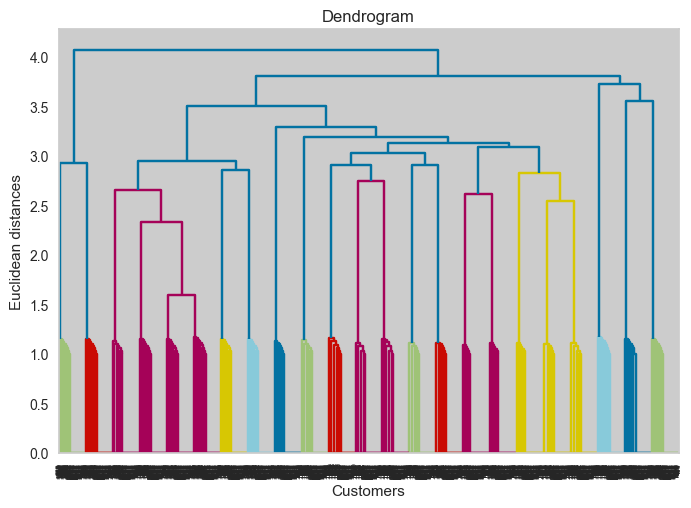

In [305]:
import scipy.cluster.hierarchy as sch
#Lets create a dendrogram variable linkage is actually the algorithm #itself of hierarchical clustering and then in linkage we have to #specify on which data we apply and engage. This is X dataset
dendrogram = sch.dendrogram(sch.linkage(dataRead, method  = "average"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()


In [306]:
from sklearn import datasets
from sklearn.metrics import silhouette_samples,silhouette_score



In [307]:
distortions = []
inertias = []
K = range(1, 20)


  
for k in K:
    kmean = KMeans(n_clusters=k,random_state=0).fit(dataRead)

    distortions.append(sum(np.min(cdist(dataRead, kmean.cluster_centers_,'euclidean'), axis=1)) / dataRead.shape[0])
    inertias.append(kmean.inertia_)

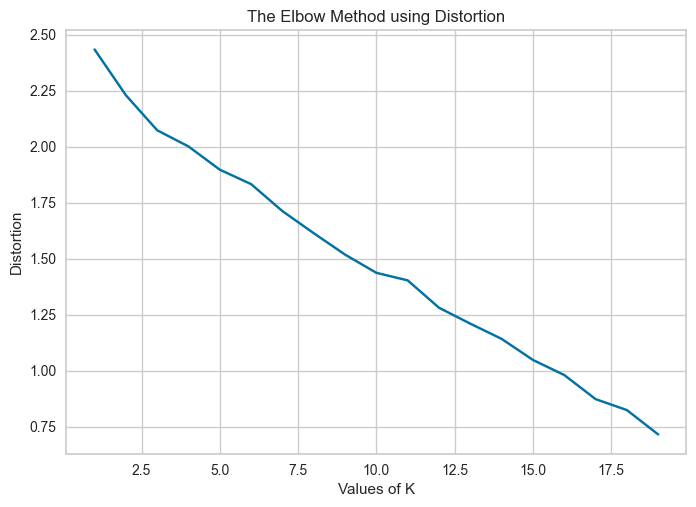

In [308]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

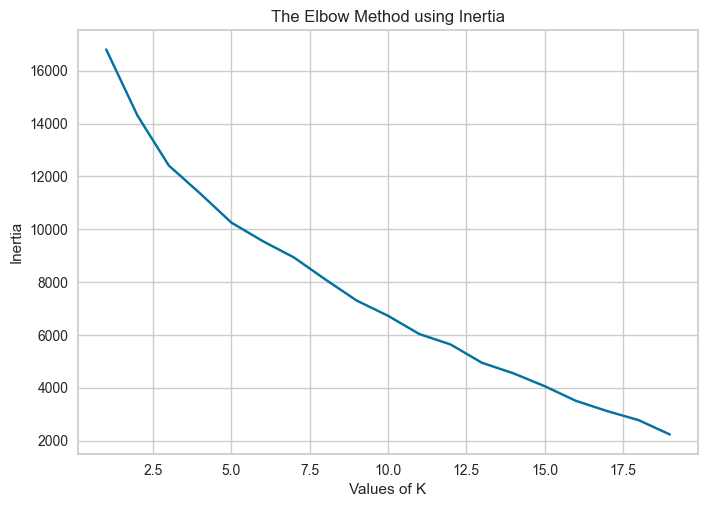

In [309]:

plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [310]:
score = silhouette_score(dataRead, kmean.labels_, metric='euclidean')

In [311]:

print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.664


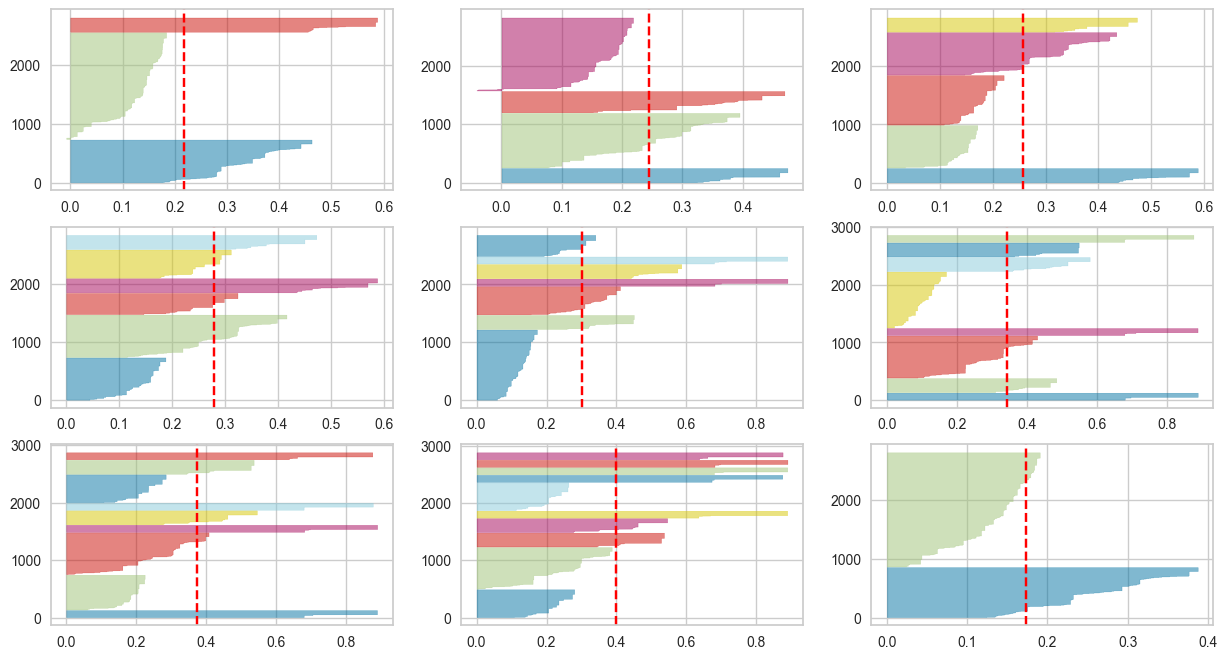

In [318]:

from yellowbrick.cluster import SilhouetteVisualizer
 
fig, ax = plt.subplots(3, 3, figsize=(15,8))
for i in [2,3, 4, 5,6,7,8,9,10]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, random_state=0)
    q, mod = divmod(i, 3)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(dataRead)

In [313]:
import csv
output =pd.read_csv('sample_submission.csv');
output['cluster'] = targetColumn;
output.to_csv('kmeann7.2.csv',index = False);